## Get data

In [1]:
import ftplib # https://docs.python.org/3/library/ftplib.html
import os
import credentials

In [2]:
def download(url, user, passwd, ftp_path, filename):
    
    with ftplib.FTP(url) as ftp:
        
        try:
            ftp.login(user, passwd)
            
            # Change directory
            ftp.cwd(ftp_path)
            
            # Download file (if there is not yet a local copy)
            if os.path.isfile(filename):
                print("There is already a local copy of {}".format(filename))
            else:
                with open(filename, 'wb') as fp:
                    ftp.retrbinary('RETR {}'.format(filename), fp.write)
        
        except ftplib.all_errors as e:
            print('FTP error:', e)
    

In [3]:
# Set credentials from environment variables
UN_CMEMS = credentials.USERNAME
PW_CMEMS = credentials.PASSWORD

In [4]:
# Check if service is reachable

with ftplib.FTP('nrt.cmems-du.eu') as ftp:
    print(ftp.getwelcome())

220 Welcome to CMEMS FTP service


In [5]:
# Check contents

with ftplib.FTP('nrt.cmems-du.eu') as ftp:
    
    try:
        ftp.login(UN_CMEMS, PW_CMEMS)
        
        # Change directory
        ftp.cwd('Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2021/05')
        
        # List directory contents with additional information
        ftp.retrlines('LIST') 
           
        # Get list of directory contents without additional information
        files = []
        ftp.retrlines('NLST', files.append) 
        print(files) 
        
        # Check file size
        print("{} MB".format(ftp.size('mfwamglocep_2021050100_R20210502.nc')/1000000))
            
    except ftplib.all_errors as e:
        print('FTP error:', e)

-rw-rw-r--    1 ftp      ftp      634563137 May 02 06:43 mfwamglocep_2021050100_R20210502.nc
-rw-rw-r--    1 ftp      ftp      634336577 May 03 06:43 mfwamglocep_2021050200_R20210503.nc
-rw-rw-r--    1 ftp      ftp      632276038 May 04 06:43 mfwamglocep_2021050300_R20210504.nc
-rw-rw-r--    1 ftp      ftp      628177665 May 05 06:42 mfwamglocep_2021050400_R20210505.nc
-rw-rw-r--    1 ftp      ftp      629027311 May 06 06:43 mfwamglocep_2021050500_R20210506.nc
-rw-rw-r--    1 ftp      ftp      628049489 May 07 06:44 mfwamglocep_2021050600_R20210507.nc
-rw-rw-r--    1 ftp      ftp      628640425 May 08 06:44 mfwamglocep_2021050700_R20210508.nc
-rw-rw-r--    1 ftp      ftp      631614075 May 09 06:43 mfwamglocep_2021050800_R20210509.nc
-rw-rw-r--    1 ftp      ftp      634159856 May 10 06:43 mfwamglocep_2021050900_R20210510.nc
-rw-rw-r--    1 ftp      ftp      641810618 May 10 06:47 mfwamglocep_2021051000_R20210510.nc
-rw-rw-r--    1 ftp      ftp      633801684 May 10 06:52 mfwamglocep_2

In [6]:
# Download file

url = 'nrt.cmems-du.eu'
path = 'Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2021/05'
filename = 'mfwamglocep_2021051900_R20210510.nc'

download(url, UN_CMEMS, PW_CMEMS, path, filename)

There is already a local copy of mfwamglocep_2021051900_R20210510.nc


## Visualize data

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [8]:
filename = 'mfwamglocep_2021051900_R20210510.nc'
path = '/home/bpondi/optimized-ship-routing/data/CMEMS/GLOBAL_ANALYSIS_FORECAST_WAV_001_027'
file = os.path.join(path,filename)
file

'/home/bpondi/optimized-ship-routing/data/CMEMS/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/mfwamglocep_2021051900_R20210510.nc'

In [9]:
ds = nc.Dataset(file)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.6
    time_coverage_start: 20210519-03:00:00
    time_coverage_end: 20210520-00:00:00
    date_created: 20210510-07:34:00
    product_type: forecast
    product: GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    product_ref_date: 20210510-00:00:00
    product_range: D+9
    product_user_manual: http://marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-027.pdf
    quality_information_document:  http://marine.copernicus.eu/documents/QUID/CMEMS-GLO-QUID-001-027.
    dataset: global-analysis-forecast-wav-001-027
    title: Mean fields from global wave model MFWAM of Meteo-France with ECMWF forcing
    institution: METEO-FRANCE
    references: http://marine.copernicus.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    licence: http://marine.copernicus.eu/services-portfolio/service-commitments-and
    contact: servicedesk.cmems@mercator-ocean.eu
    producer: CMEMS 

In [17]:
# Variables
for var in ds.variables:
    print(var)

longitude
latitude
time
VHM0
VMDR_WW
VHM0_WW
VMDR_SW1
VTM01_SW1
VMDR_SW2
VTM01_SW2
VMDR
VTM10
VHM0_SW1
VHM0_SW2
VTPK
VSDX
VSDY
VPED
VTM02
VTM01_WW


In [18]:
# Dictionaries for plot labelling

param_dict = {
    'VHM0': {'variable': 'Spectral significant wave height (Hm0)', 'unit': 'm'},
    'VMDR_WW': {'variable': 'Mean wind wave direction from', 'unit': 'degree'},
    'VHM0_WW': {'variable': 'Spectral significant wind wave height', 'unit': 'm'},
    'VMDR_SW1': {'variable': 'Mean primary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW1':{'variable': 'Spectral moments (0,1) primary swell wave period', 'unit': 's'},
    'VMDR_SW2': {'variable': 'Mean secondary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW2': {'variable': 'Spectral moments (0,1) secondary swell wave period', 'unit': 's'},
    'VMDR': {'variable': 'Mean wave direction from (Mdir)', 'unit': 'degree'},
    'VTM10': {'variable': 'Spectral moments (-1,0) wave period (Tm-10)', 'unit': 's'},
    'VHM0_SW1': {'variable': 'Spectral significant primary swell wave height', 'unit': 'm'},
    'VHM0_SW2': {'variable': 'Spectral significant secondary swell wave height', 'unit': 'm'},
    'VTPK': {'variable': 'Wave period at spectral peak / peak period (Tp)', 'unit': 's'},
    'VSDX': {'variable': 'Stokes drift U', 'unit': 'm/s'},
    'VSDY': {'variable': 'Stokes drift V', 'unit': 'm/s'},
    'VPED': {'variable': 'Wave principal direction at spectral peak', 'unit': 'degree'},
    'VTM02': {'variable': 'Spectral moments (0,2) wave period (Tm02)', 'unit': 's'},
    'VTM01_WW': {'variable': 'Spectral moments (0,1) wind wave period', 'unit': 's'}
}


time_dict = {
    0: '00 UTC',
    1: '03 UTC',
    2: '06 UTC',
    3: '09 UTC',
    4: '12 UTC',
    5: '15 UTC',
    6: '18 UTC',
    7: '21 UTC',
}

In [19]:
def hide_axes(ax):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

### One variable at every timestep

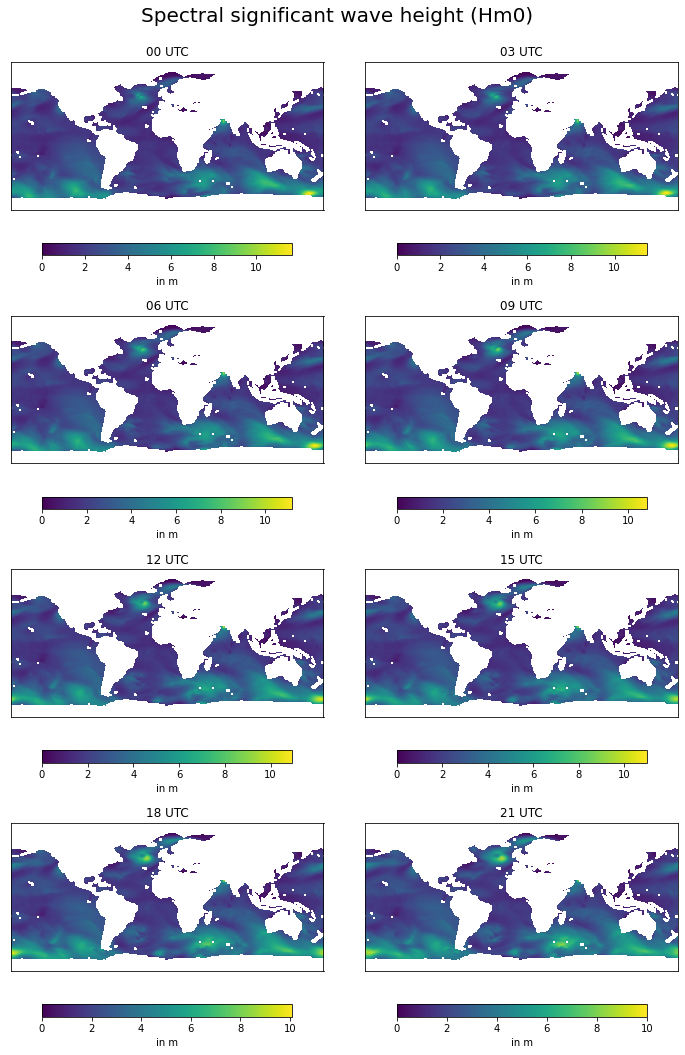

In [13]:
parameter = 'VHM0'

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10,15))
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
im_list = []
fig.tight_layout(rect=[0, 0, 1, 0.95])

fig.suptitle(param_dict[parameter]['variable'], fontsize=20)

for idx, ax in enumerate(ax_list):
    im = ax.imshow(np.flipud(ds[parameter][idx, :, :]), extent=[0,4320,0,2041])
    im_list.append(im)
    ax.title.set_text(time_dict[idx])
    hide_axes(ax)  

    fig.colorbar(im, ax=ax, orientation='horizontal', label='in {}'.format(param_dict[parameter]['unit']), shrink=0.8);

### All variables at one time

In [21]:
# remove [longitude, latitude, time]
variables = list(ds.variables.keys())[3:] 
variables

['VHM0',
 'VMDR_WW',
 'VHM0_WW',
 'VMDR_SW1',
 'VTM01_SW1',
 'VMDR_SW2',
 'VTM01_SW2',
 'VMDR',
 'VTM10',
 'VHM0_SW1',
 'VHM0_SW2',
 'VTPK',
 'VSDX',
 'VSDY',
 'VPED',
 'VTM02',
 'VTM01_WW']

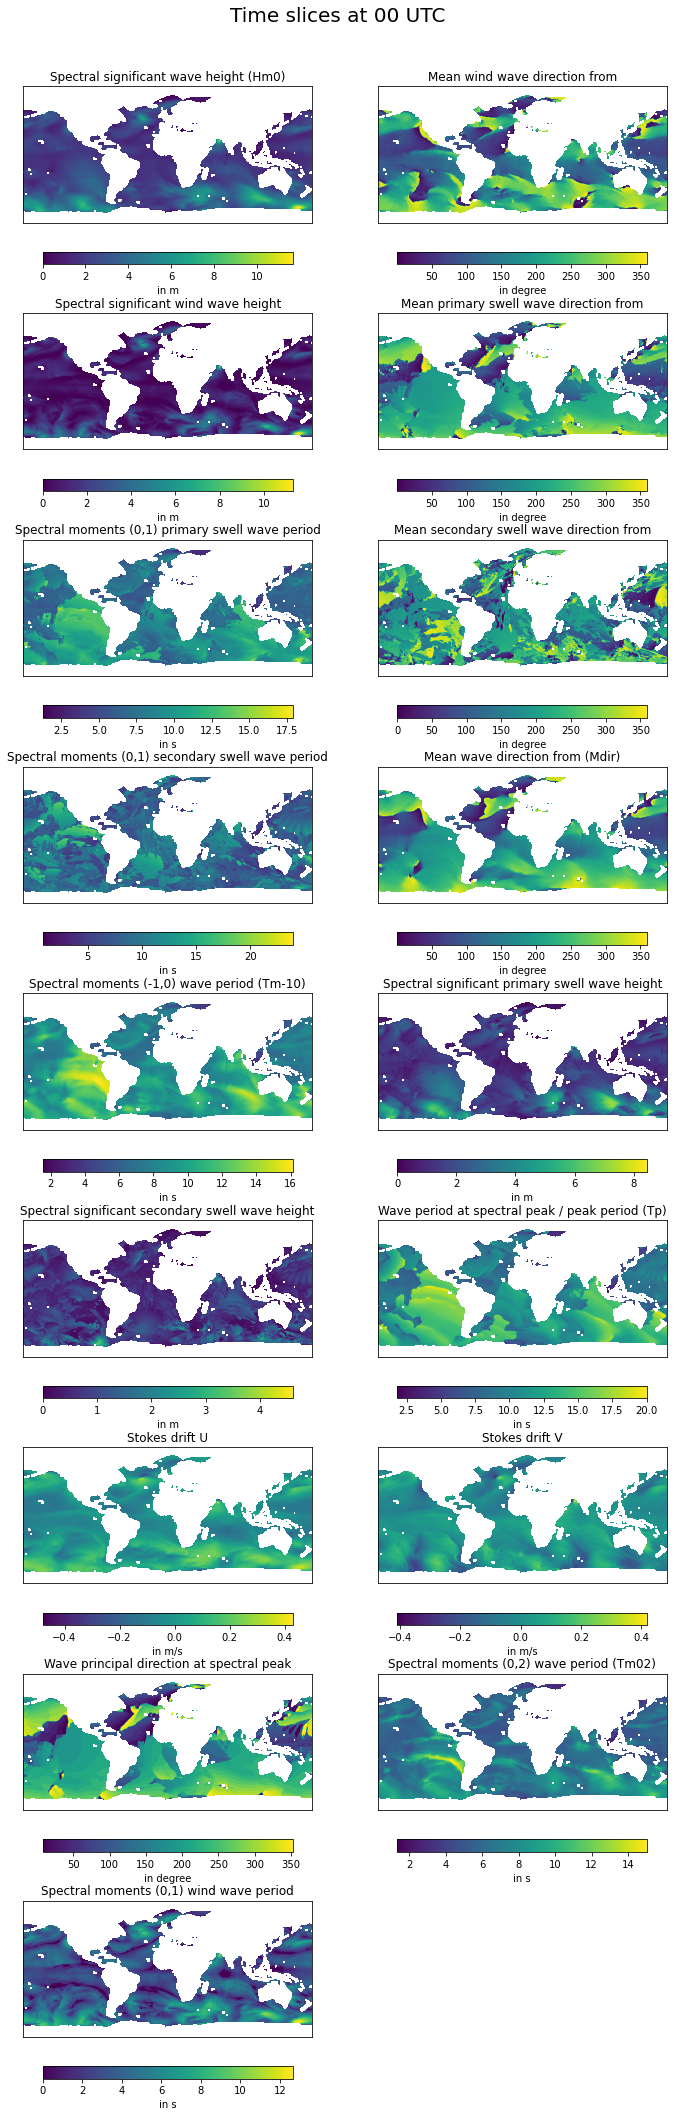

In [22]:
time_slice = 0

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),
      (ax7, ax8), (ax9, ax10), (ax11, ax12),
      (ax13, ax14), (ax15, ax16), (ax17, ax18)) = plt.subplots(9, 2, figsize=(10,30))

fig.tight_layout(rect=[0, 0, 1, 0.95])

ax_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17]
im_list = []
fig.suptitle('Time slices at {}'.format(time_dict[time_slice]), fontsize=20)
fig.delaxes(ax18)   

for idx, ax in enumerate(ax_list):
    im = ax.imshow(np.flipud(ds[variables[idx]][time_slice, :, :]), extent=[0,4320,0,2041])
    im_list.append(im)
    ax.title.set_text(param_dict[variables[idx]]['variable'])
    hide_axes(ax)  

    fig.colorbar(im, ax=ax, orientation='horizontal', label='in {}'.format(param_dict[variables[idx]]['unit']), shrink=0.8);

### Export one plot

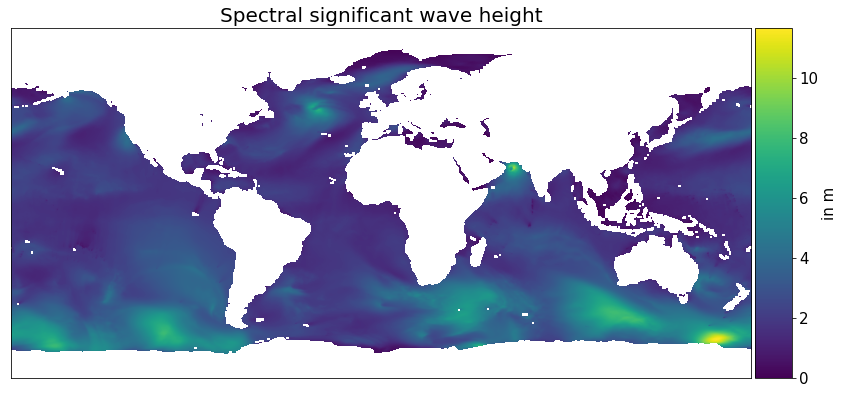

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

parameter = 'VHM0'
idx = 0

fig = plt.figure(figsize=(14,20))
ax = plt.gca()
ax.set_title('Spectral significant wave height', fontsize=20)
im = ax.imshow(np.flipud(ds[parameter][idx, :, :]), extent=[0,4320,0,2041])
hide_axes(im)      
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('in {}'.format(param_dict[parameter]['unit']), size=15)
cbar.ax.tick_params(labelsize=15) 
plt.savefig('saved_plot.png')